**CODERHOUSE**

**Primera Entrega**



Carlos Arturo Rodríguez




**Data Science I**



Datos: https://www.kaggle.com/datasets/rikdifos/credit-card-approval-prediction/



# Hipotesis inicial

A seguir se presenta varias hipótesis iniciales del dataset **Credit Card Approval Prediction**


| Hipótesis | Razonamiento                                                                                                                  |
| --------- | ----------------------------------------------------------------------------------------------------------------------------- |
| H0        | El ingreso total (`AMT_INCOME_TOTAL`) está relacionado con el tipo de educación y la ocupación.                               |
| H1        | Las personas con mayor número de hijos (`CNT_CHILDREN`) tienden a tener mayores ingresos familiares, pero también más gastos. |
| H2        | La edad (`DAYS_BIRTH`) y el tiempo de empleo (`DAYS_EMPLOYED`) son predictores fuertes del nivel de ingreso.                  |
| H3        | Las mujeres (CODE\_GENDER = F) tienen ingresos inferiores a los hombres en promedio.                                          |
| H4        | Tener casa propia (`FLAG_OWN_REALTY=Y`) se asocia con ingresos más altos y estabilidad laboral.                               |


# Carga de Datos

import pandas as pd

In [166]:
import pandas as pd

#Se tenía un dataset de 53.4MB dado que github acepta un peso max de 20MB fue necesario dividirlo en 3 datasets
df_1 = pd.read_csv('https://raw.githubusercontent.com/carlosarturo86/Coder_DS1/refs/heads/main/application_record%20_part1.csv')
df_2 = pd.read_csv('https://raw.githubusercontent.com/carlosarturo86/Coder_DS1/refs/heads/main/application_record%20_part2.csv',index_col=False)
df_3 = pd.read_csv('https://raw.githubusercontent.com/carlosarturo86/Coder_DS1/refs/heads/main/application_record%20_part3.csv',index_col=False)


# df_1.head()

# df_2.head()
# df_3.head()

df_conc = pd.concat([df_1,df_2,df_3], ignore_index=True)
df = df_conc
df.head()
#Descargar Archivo concatenando y verificar
# from google.colab import files
# nombre_archivo_salida = 'mi_archivo_concatenado.csv'
# df_conc.to_csv(nombre_archivo_salida, index=False)
# files.download(nombre_archivo_salida)

,ID,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_MOBIL,FLAG_WORK_PHONE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS
0,5008804,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-12005,-4542,1,1,0,0,NaN,2.0
1,5008805,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-12005,-4542,1,1,0,0,NaN,2.0
2,5008806,M,Y,Y,0,112500.0,Working,Secondary / secondary special,Married,House / apartment,-21474,-1134,1,0,0,0,Security staff,2.0
3,5008808,F,N,Y,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,-19110,-3051,1,0,1,1,Sales staff,1.0
4,5008809,F,N,Y,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,-19110,-3051,1,0,1,1,Sales staff,1.0


In [167]:
df.tail(3)

,ID,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_MOBIL,FLAG_WORK_PHONE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS
438554,6841878,F,N,N,0,54000.0,Commercial associate,Higher education,Single / not married,With parents,-8169,-372,1,1,0,0,Sales staff,1.0
438555,6842765,F,N,Y,0,72000.0,Pensioner,Secondary / secondary special,Married,House / apartment,-21673,365243,1,0,0,0,NaN,2.0
438556,6842885,F,N,Y,0,121500.0,Working,Secondary / secondary special,Married,House / apartment,-18858,-1201,1,0,1,0,Sales staff,2.0


ID:	Client number

CODE_GENDER:Gender

FLAG_OWN_CAR:	Is there a car

FLAG_OWN_REALTY:	Is there a property

CNT_CHILDREN:	Number of children

AMT_INCOME_TOTAL:	Annual income

NAME_INCOME_TYPE:	Income category

NAME_EDUCATION_TYPE:	Education level

NAME_FAMILY_STATUS:	Marital status

NAME_HOUSING_TYPE:	Way of living

DAYS_BIRTH:	Birthday	Count backwards from current day (0), -1 means yesterday

DAYS_EMPLOYED:	Start date of employment	Count backwards from current day(0). If positive, it means the person currently unemployed.

FLAG_MOBIL:	Is there a mobile phone

FLAG_WORK_PHONE:	Is there a work phone

FLAG_PHONE:	Is there a phone

FLAG_EMAIL:	Is there an email

OCCUPATION_TYPE:	Occupation

CNT_FAM_MEMBERS:	Family size

# Análisis Exploratorio de Datos (EDA)

In [168]:
#Tamaño del Dataframe
df.shape

(438557, 18)

In [169]:
df.head()

,ID,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_MOBIL,FLAG_WORK_PHONE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS
0,5008804,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-12005,-4542,1,1,0,0,NaN,2.0
1,5008805,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-12005,-4542,1,1,0,0,NaN,2.0
2,5008806,M,Y,Y,0,112500.0,Working,Secondary / secondary special,Married,House / apartment,-21474,-1134,1,0,0,0,Security staff,2.0
3,5008808,F,N,Y,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,-19110,-3051,1,0,1,1,Sales staff,1.0
4,5008809,F,N,Y,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,-19110,-3051,1,0,1,1,Sales staff,1.0


In [170]:
#información resumen conciso de los datos, tipo de datos y si hay o no nulos
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 438557 entries, 0 to 438556
Data columns (total 18 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   ID                   438557 non-null  int64  
 1   CODE_GENDER          438557 non-null  object 
 2   FLAG_OWN_CAR         438557 non-null  object 
 3   FLAG_OWN_REALTY      438557 non-null  object 
 4   CNT_CHILDREN         438557 non-null  int64  
 5   AMT_INCOME_TOTAL     438557 non-null  float64
 6   NAME_INCOME_TYPE     438557 non-null  object 
 7   NAME_EDUCATION_TYPE  438557 non-null  object 
 8   NAME_FAMILY_STATUS   438557 non-null  object 
 9   NAME_HOUSING_TYPE    438557 non-null  object 
 10  DAYS_BIRTH           438557 non-null  int64  
 11  DAYS_EMPLOYED        438557 non-null  int64  
 12  FLAG_MOBIL           438557 non-null  int64  
 13  FLAG_WORK_PHONE      438557 non-null  int64  
 14  FLAG_PHONE           438557 non-null  int64  
 15  FLAG_EMAIL       

Para los 18 atributos se observa valores faltantes únicamente en Occupation_Types, que es un vble categórica

In [171]:
df.describe() # Vbles numéricas

,ID,CNT_CHILDREN,AMT_INCOME_TOTAL,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_MOBIL,FLAG_WORK_PHONE,FLAG_PHONE,FLAG_EMAIL,CNT_FAM_MEMBERS
count,4.385570e+05,438557.000000,4.385570e+05,438557.000000,438557.000000,438557.0,438557.000000,438557.000000,438557.000000,438557.000000
mean,6.022176e+06,0.427390,1.875243e+05,-15997.904649,60563.675328,1.0,0.206133,0.287771,0.108207,2.194465
std,5.716370e+05,0.724882,1.100869e+05,4185.030007,138767.799647,0.0,0.404527,0.452724,0.310642,0.897207
min,5.008804e+06,0.000000,2.610000e+04,-25201.000000,-17531.000000,1.0,0.000000,0.000000,0.000000,1.000000
25%,5.609375e+06,0.000000,1.215000e+05,-19483.000000,-3103.000000,1.0,0.000000,0.000000,0.000000,2.000000
50%,6.047745e+06,0.000000,1.607805e+05,-15630.000000,-1467.000000,1.0,0.000000,0.000000,0.000000,2.000000
75%,6.456971e+06,1.000000,2.250000e+05,-12514.000000,-371.000000,1.0,0.000000,1.000000,0.000000,3.000000
max,7.999952e+06,19.000000,6.750000e+06,-7489.000000,365243.000000,1.0,1.000000,1.000000,1.000000,20.000000


                        

*   CNT_CHILDREN: 75 % de los clientes tienen 0 o 1 hijo.   
*   DAYS_EMPLOYED: algunos valores positivos grandes → probablemente “365243” indica jubilado (empleado desde hace muchos días).
*   DAYS_BIRTH: valores negativos, edad en días que se pueden convertir en años.
*   AMT_INCOME_TOTAL: un 75% de la población tiene un ingreso de 225.000 al año.
*   DAYS_EMPLOYED: por lo menos el 75% de la población tiene como minimo 1 año (365 días) como empleado








In [172]:
df.describe(include=object) #vbles categóricas

,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,OCCUPATION_TYPE
count,438557,438557,438557,438557,438557,438557,438557,304354
unique,2,2,2,5,5,5,6,18
top,F,N,Y,Working,Secondary / secondary special,Married,House / apartment,Laborers
freq,294440,275459,304074,226104,301821,299828,393831,78240


In [173]:
#Contar cantidad de valores nulos existentes en cada atributo
df.isnull().sum()

,0
ID,0
CODE_GENDER,0
FLAG_OWN_CAR,0
FLAG_OWN_REALTY,0
CNT_CHILDREN,0
AMT_INCOME_TOTAL,0
NAME_INCOME_TYPE,0
NAME_EDUCATION_TYPE,0
NAME_FAMILY_STATUS,0
NAME_HOUSING_TYPE,0


In [174]:
# % Valores nulos
(df.isnull().sum()/len(df))*100

,0
ID,0.000000
CODE_GENDER,0.000000
FLAG_OWN_CAR,0.000000
FLAG_OWN_REALTY,0.000000
CNT_CHILDREN,0.000000
AMT_INCOME_TOTAL,0.000000
NAME_INCOME_TYPE,0.000000
NAME_EDUCATION_TYPE,0.000000
NAME_FAMILY_STATUS,0.000000
NAME_HOUSING_TYPE,0.000000


In [175]:
# Contar ocurrencias únicas en una columna por medio de value_counts, ordanando de mayor a menor, siendo Laborers con más valores e IT Staff la de menor valor
df["OCCUPATION_TYPE"].value_counts()

,count
OCCUPATION_TYPE,
Laborers,78240
Core staff,43007
Sales staff,41098
Managers,35487
Drivers,26090
High skill tech staff,17289
Accountants,15985
Medicine staff,13520
Cooking staff,8076


In [176]:
#En Occupation_Type decidí cambiar los valores NULOS por Value not supplied, decidí no eliminar las filas que tenían los valores nulos dado que representan el 30.60%
#del total de los atributos de OCCUPATION_TYPE
#Realizado lo anterior ya no hay valores nulos para cada atributo del dataframe
df["OCCUPATION_TYPE"] = df["OCCUPATION_TYPE"].fillna('value not supplied')
df["OCCUPATION_TYPE"].value_counts()

,count
OCCUPATION_TYPE,
value not supplied,134203
Laborers,78240
Core staff,43007
Sales staff,41098
Managers,35487
Drivers,26090
High skill tech staff,17289
Accountants,15985
Medicine staff,13520


In [177]:
# Para verificar si hay valores duplicados
df.duplicated().sum()

np.int64(0)

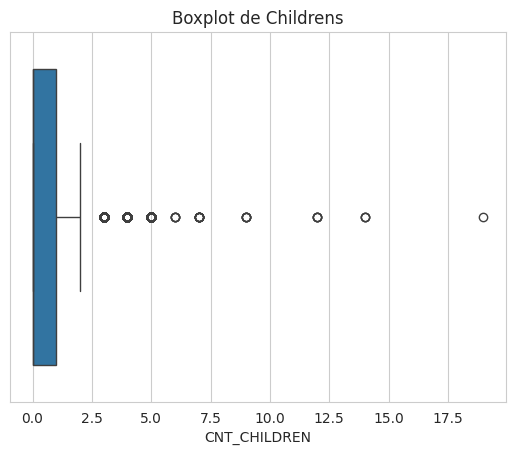

In [178]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.boxplot(x=df['CNT_CHILDREN'])
plt.title('Boxplot de Childrens')
plt.show()

In [179]:
#Uso de Filtrado#
df[(df['CNT_CHILDREN'] >8)].count() # Hay 13 valores por encima de 8.


,0
ID,13
CODE_GENDER,13
FLAG_OWN_CAR,13
FLAG_OWN_REALTY,13
CNT_CHILDREN,13
AMT_INCOME_TOTAL,13
NAME_INCOME_TYPE,13
NAME_EDUCATION_TYPE,13
NAME_FAMILY_STATUS,13
NAME_HOUSING_TYPE,13


In [180]:
df[(df['CNT_CHILDREN'] >8)] #Se aprecia un valor ALTO (posible outlier) de 19 hijos.

,ID,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_MOBIL,FLAG_WORK_PHONE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS
20441,5061207,M,Y,Y,14,225000.0,Working,Secondary / secondary special,Separated,House / apartment,-17754,-1689,1,0,0,0,Drivers,15.0
20442,5061210,M,Y,Y,14,225000.0,Working,Secondary / secondary special,Separated,House / apartment,-17754,-1689,1,0,0,0,Drivers,15.0
20443,5061211,M,Y,Y,14,225000.0,Working,Secondary / secondary special,Separated,House / apartment,-17754,-1689,1,0,0,0,Drivers,15.0
36388,5105054,F,N,Y,19,112500.0,Working,Secondary / secondary special,Single / not married,House / apartment,-11057,-1853,1,1,1,0,Waiters/barmen staff,20.0
79645,5307273,M,Y,N,9,270000.0,Working,Secondary / secondary special,Civil marriage,House / apartment,-14718,-5011,1,1,0,0,Drivers,11.0
79646,5307274,M,Y,N,9,270000.0,Working,Secondary / secondary special,Civil marriage,House / apartment,-14718,-5011,1,1,0,0,Drivers,11.0
79647,5372460,M,Y,N,9,270000.0,Working,Secondary / secondary special,Civil marriage,House / apartment,-14718,-5011,1,1,0,0,Drivers,11.0
79648,5372461,M,Y,N,9,270000.0,Working,Secondary / secondary special,Civil marriage,House / apartment,-14718,-5011,1,1,0,0,Drivers,11.0
208909,5931568,F,N,Y,12,337500.0,Commercial associate,Secondary / secondary special,Married,House / apartment,-14093,-2710,1,0,0,0,Core staff,14.0
208910,5931569,F,N,Y,12,337500.0,Commercial associate,Secondary / secondary special,Married,House / apartment,-14093,-2710,1,0,0,0,Core staff,14.0


In [181]:
df['CNT_CHILDREN'].mean()

np.float64(0.42739028222101116)

In [182]:
df[(df['CNT_CHILDREN'] <=1)].count()

,0
ID,392598
CODE_GENDER,392598
FLAG_OWN_CAR,392598
FLAG_OWN_REALTY,392598
CNT_CHILDREN,392598
AMT_INCOME_TOTAL,392598
NAME_INCOME_TYPE,392598
NAME_EDUCATION_TYPE,392598
NAME_FAMILY_STATUS,392598
NAME_HOUSING_TYPE,392598


In [183]:
(df[(df['CNT_CHILDREN'] <=1)].count() /len(df))*100 #El %	89.52 de los valores apunta que las personas tienen 1 hijo o no tienen hijos


,0
ID,89.520404
CODE_GENDER,89.520404
FLAG_OWN_CAR,89.520404
FLAG_OWN_REALTY,89.520404
CNT_CHILDREN,89.520404
AMT_INCOME_TOTAL,89.520404
NAME_INCOME_TYPE,89.520404
NAME_EDUCATION_TYPE,89.520404
NAME_FAMILY_STATUS,89.520404
NAME_HOUSING_TYPE,89.520404


In [184]:
# Agrupando por CNT_CHILDREN para saber la Cantidad de cada valor único de CNT_CHILDREN
df.groupby('CNT_CHILDREN').count()

,ID,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,AMT_INCOME_TOTAL,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_MOBIL,FLAG_WORK_PHONE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS
CNT_CHILDREN,,,,,,,,,,,,,,,,,
0,304071,304071,304071,304071,304071,304071,304071,304071,304071,304071,304071,304071,304071,304071,304071,304071,304071
1,88527,88527,88527,88527,88527,88527,88527,88527,88527,88527,88527,88527,88527,88527,88527,88527,88527
2,39884,39884,39884,39884,39884,39884,39884,39884,39884,39884,39884,39884,39884,39884,39884,39884,39884
3,5430,5430,5430,5430,5430,5430,5430,5430,5430,5430,5430,5430,5430,5430,5430,5430,5430
4,486,486,486,486,486,486,486,486,486,486,486,486,486,486,486,486,486
5,133,133,133,133,133,133,133,133,133,133,133,133,133,133,133,133,133
6,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4
7,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9
9,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5


In [185]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

data =df['AMT_INCOME_TOTAL']
data

,AMT_INCOME_TOTAL
0,427500.0
1,427500.0
2,112500.0
3,270000.0
4,270000.0
...,...
438552,135000.0
438553,103500.0
438554,54000.0
438555,72000.0


In [186]:
# Calculo los cuartiles y el IQR
Q1 = np.percentile(data, 25)
median = np.percentile(data, 50)
Q3 = np.percentile(data, 75)
IQR = Q3 - Q1
# Calculo de los límites para los outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

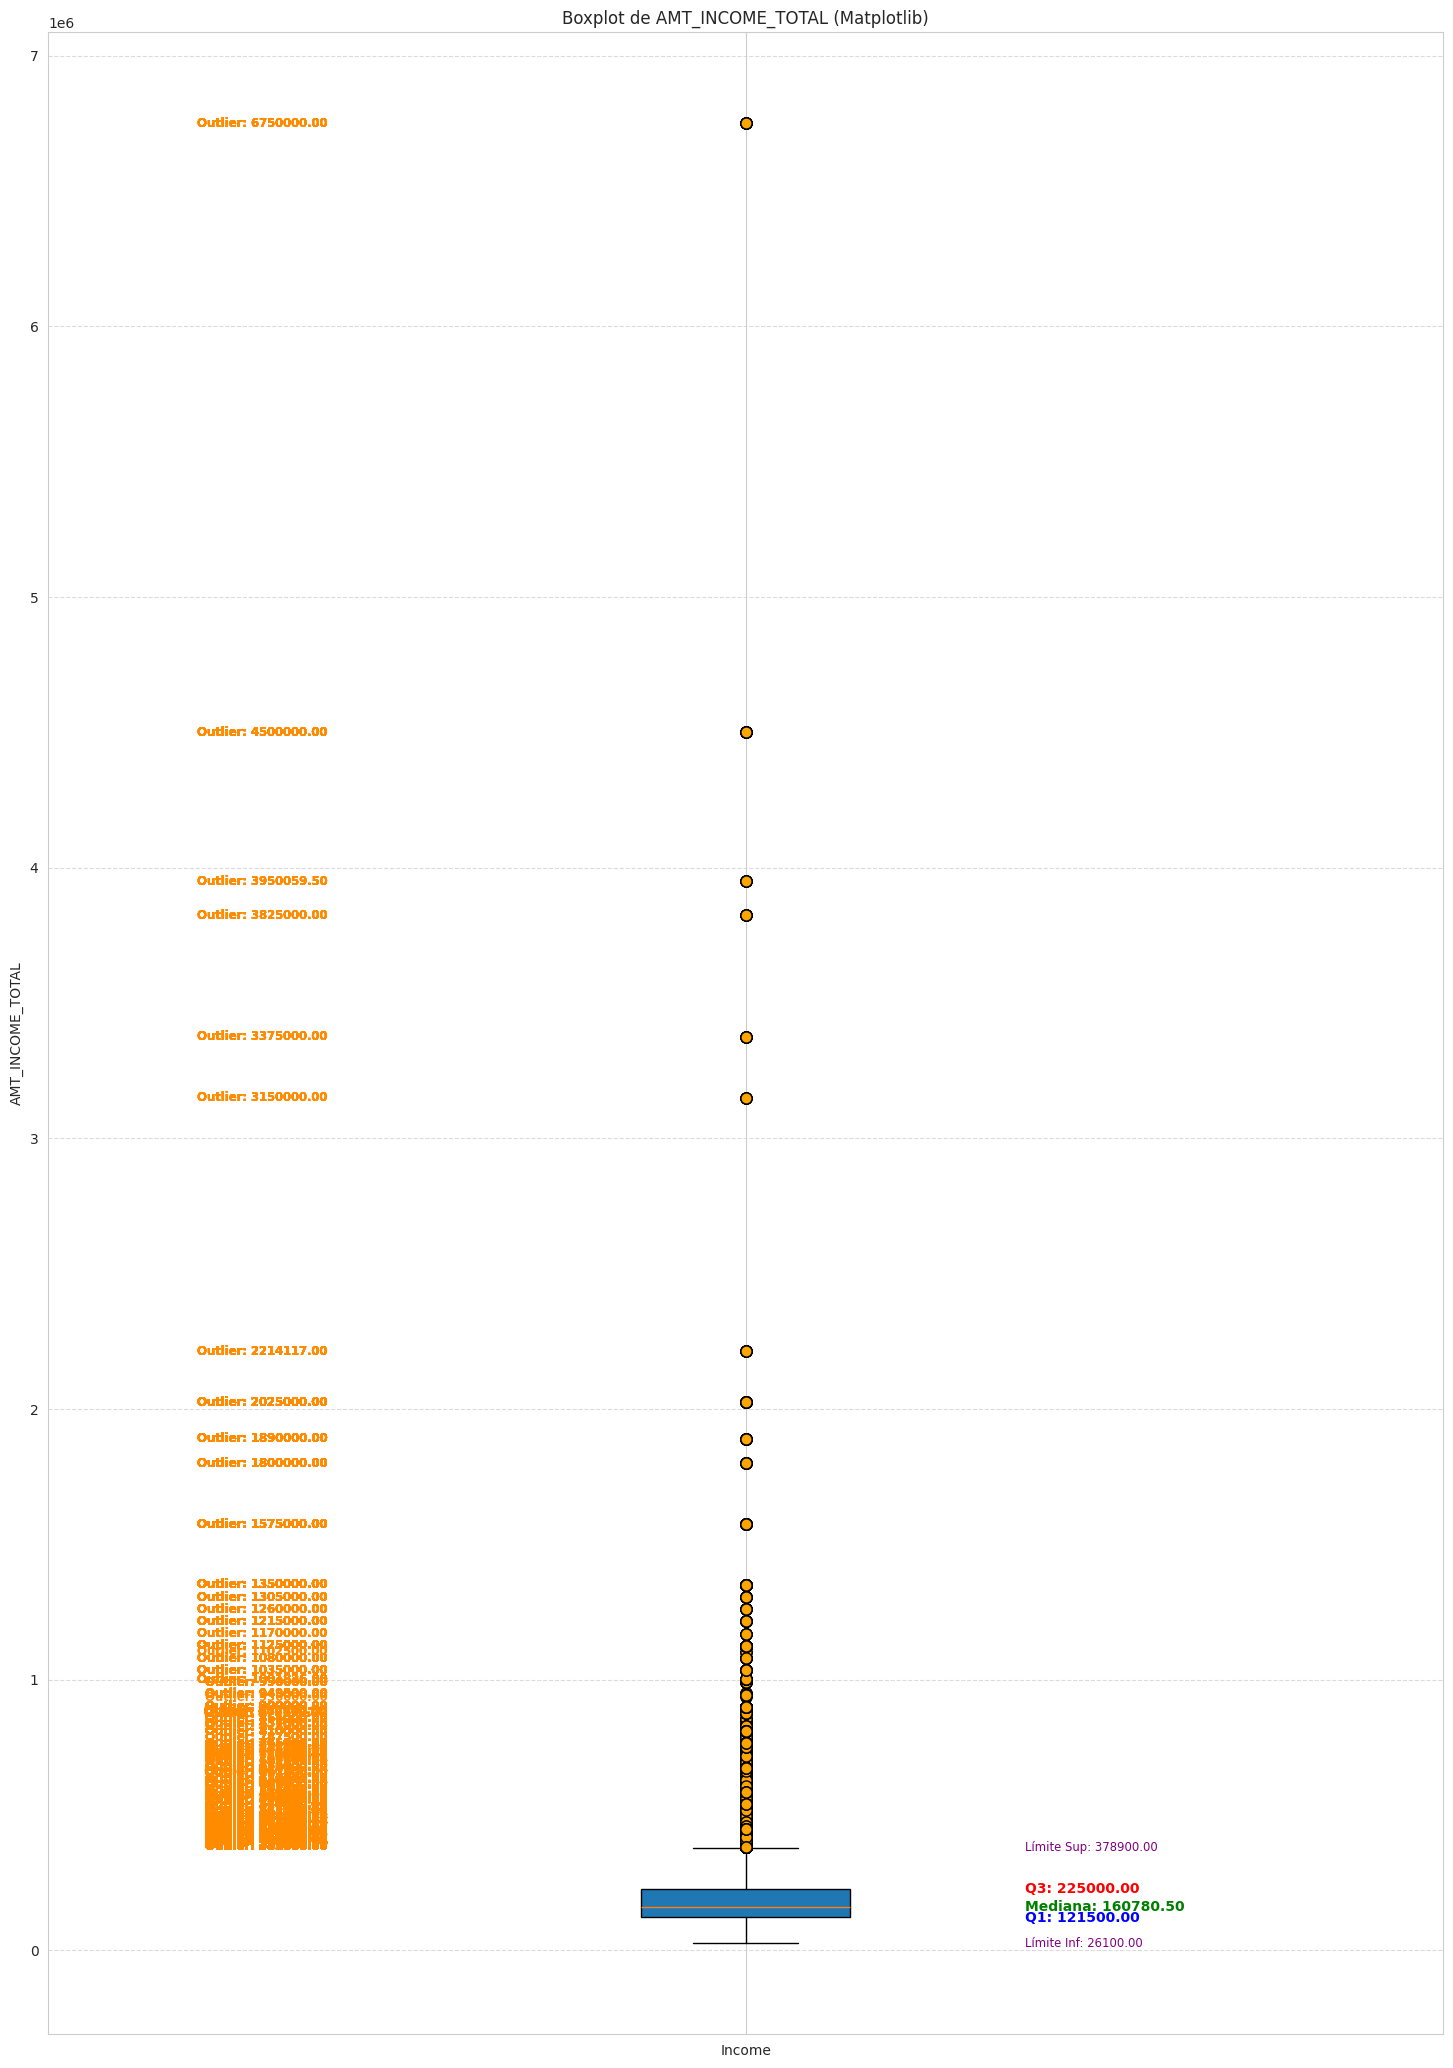

In [187]:
#Dimensión de la fig
plt.figure(figsize=(18, 26))

sns.set_style("whitegrid")
#
# 'vert=True' para un boxplot vertical
# 'patch_artist=True' permite rellenar las cajas con color
# 'flierprops' controla las propiedades de los puntos de los outliers
boxplot_dict = plt.boxplot(data, vert=True, patch_artist=True,
                           flierprops=dict(markerfacecolor='orange', marker='o', markersize=8,
                                           markeredgecolor='black'))

plt.title('Boxplot de AMT_INCOME_TOTAL (Matplotlib)')
plt.ylabel('AMT_INCOME_TOTAL')
plt.xticks([1], ['Income']) # Establece una etiqueta para el eje X si solo hay un boxplot

# Obtener las "whiskers" (bigotes) para las anotaciones
# boxplot_dict['whiskers'][0] es el bigote inferior, boxplot_dict['whiskers'][1] es el superior
lower_whisker = boxplot_dict['whiskers'][0].get_ydata()[1]
upper_whisker = boxplot_dict['whiskers'][1].get_ydata()[1]

# marcar cuartiles y límites dentro de la figura
plt.text(1.2, Q1, f'Q1: {Q1:.2f}', verticalalignment='center', horizontalalignment='left', color='blue', weight='semibold')
plt.text(1.2, median, f'Mediana: {median:.2f}', verticalalignment='center', horizontalalignment='left', color='green', weight='semibold')
plt.text(1.2, Q3, f'Q3: {Q3:.2f}', verticalalignment='center', horizontalalignment='left', color='red', weight='semibold')
plt.text(1.2, lower_whisker, f'Límite Inf: {lower_whisker:.2f}', verticalalignment='center', horizontalalignment='left', color='purple', size='small')
plt.text(1.2, upper_whisker, f'Límite Sup: {upper_whisker:.2f}', verticalalignment='center', horizontalalignment='left', color='purple', size='small')


# Identificar y anotar outliers
outliers = data[(data < lower_bound) | (data > upper_bound)]
if not outliers.empty:
    for outlier_val in outliers:
        plt.text(0.7, outlier_val, f'Outlier: {outlier_val:.2f}', horizontalalignment='right',
                 verticalalignment='center', size='small', color='darkorange', weight='bold')

plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


In [188]:
print(f'Outlier Valor minimo:', min(outliers))
print(f'Outlier Valor máximo:',max(outliers))

Outlier Valor minimo: 382500.0
Outlier Valor máximo: 6750000.0


 **Tipos de Educación, ingresos, estado civil y tipo de vivienda que tienes los distintos clientes**

In [189]:
df['NAME_EDUCATION_TYPE'].value_counts()

,count
NAME_EDUCATION_TYPE,
Secondary / secondary special,301821
Higher education,117522
Incomplete higher,14851
Lower secondary,4051
Academic degree,312


Text(0, 0.5, 'Conteo')

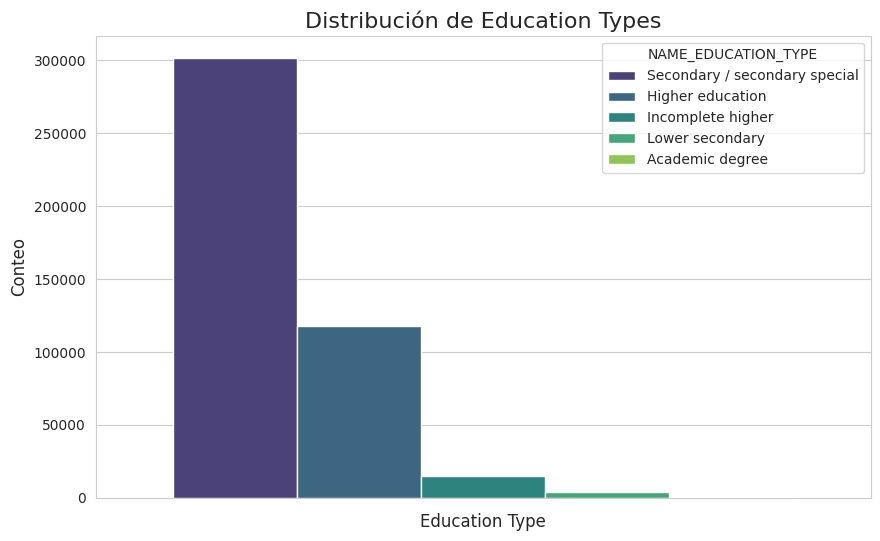

In [190]:
# Create the bar plot
plt.figure(figsize=(10, 6)) # Adjust figure size for better visualization
sns.barplot(hue=df['NAME_EDUCATION_TYPE'].value_counts().index, y=df['NAME_EDUCATION_TYPE'].value_counts().values, palette='viridis')
plt.title('Distribución de Education Types', fontsize=16)
plt.xlabel('Education Type', fontsize=12)
plt.ylabel('Conteo', fontsize=12)


In [191]:
df['NAME_INCOME_TYPE'].value_counts()

,count
NAME_INCOME_TYPE,
Working,226104
Commercial associate,100757
Pensioner,75493
State servant,36186
Student,17


In [192]:
df['NAME_FAMILY_STATUS'].value_counts()

,count
NAME_FAMILY_STATUS,
Married,299828
Single / not married,55271
Civil marriage,36532
Separated,27251
Widow,19675


In [193]:
df['NAME_HOUSING_TYPE'].value_counts()

,count
NAME_HOUSING_TYPE,
House / apartment,393831
With parents,19077
Municipal apartment,14214
Rented apartment,5974
Office apartment,3922
Co-op apartment,1539


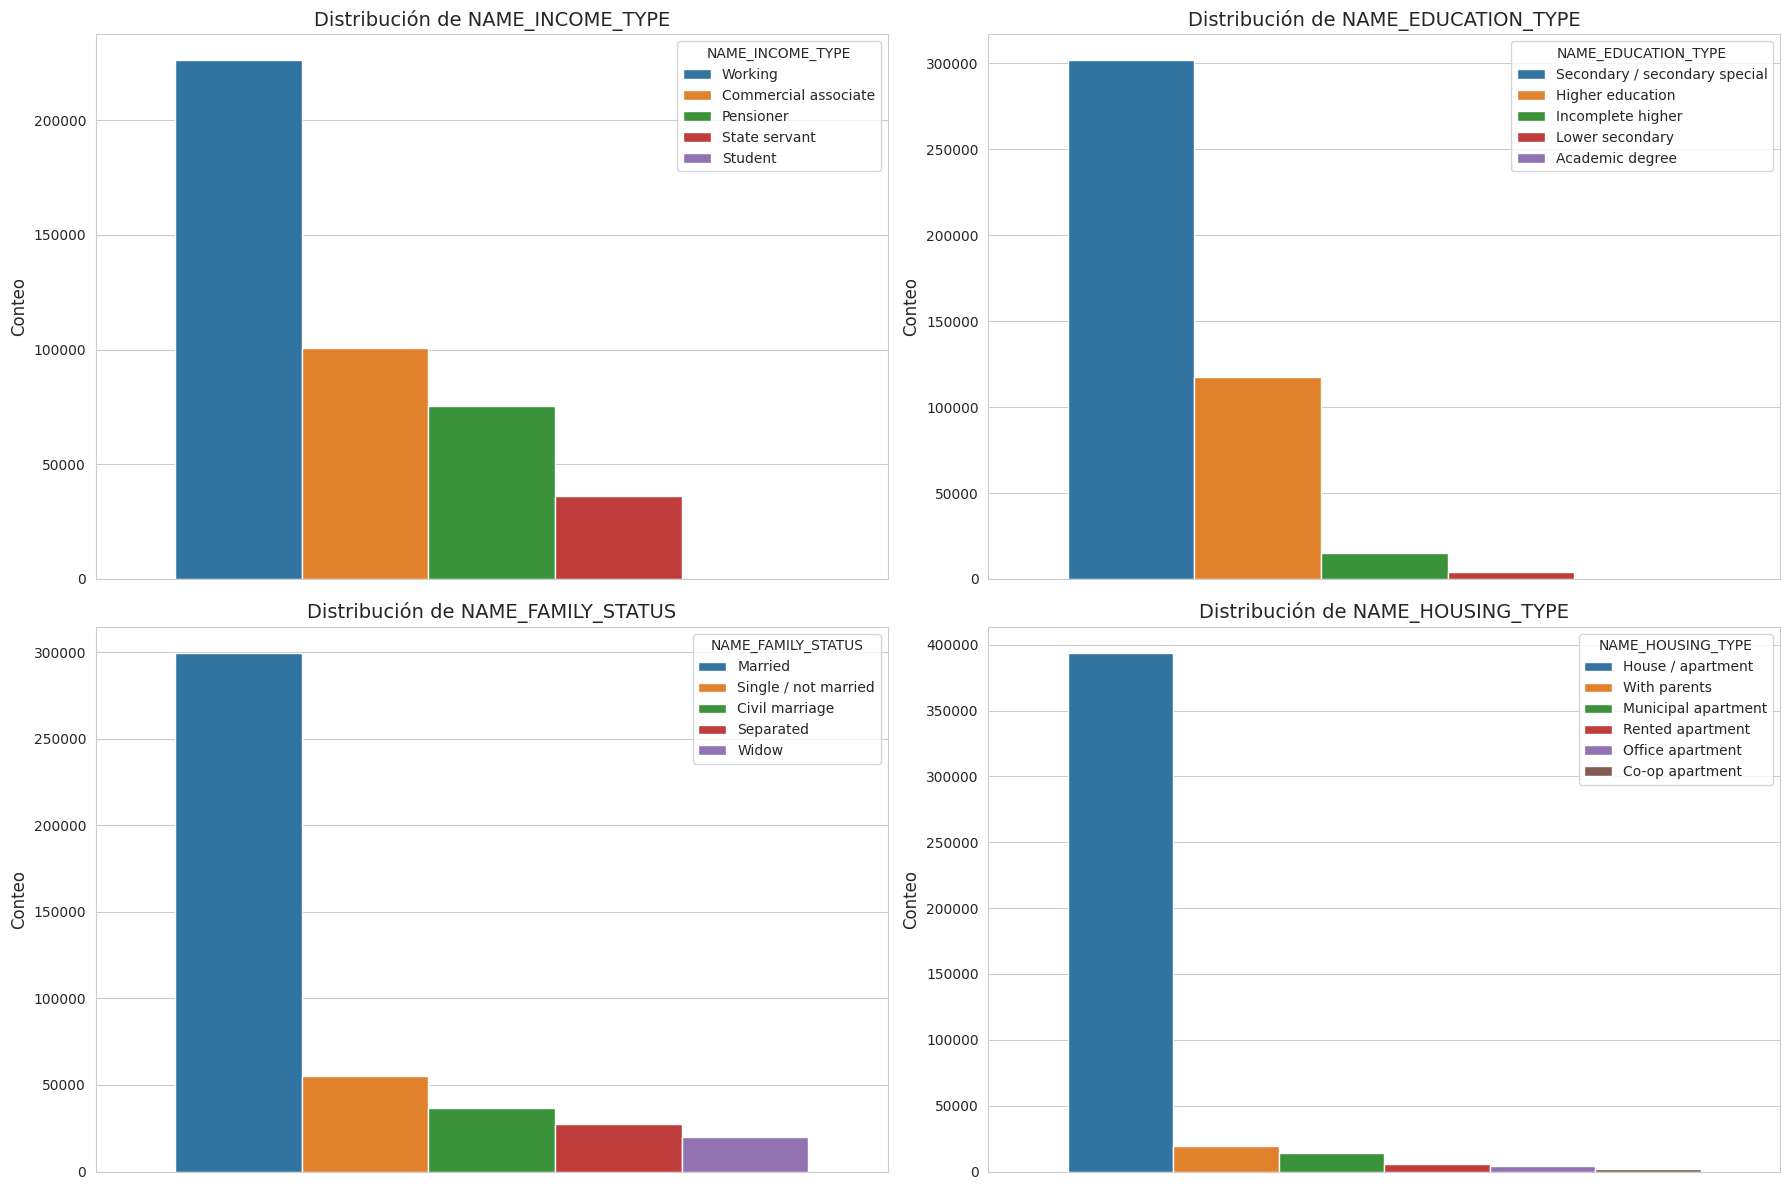

In [194]:
# Lista de columnas categóricas a graficar
columnas_a_graficar = ['NAME_INCOME_TYPE', 'NAME_EDUCATION_TYPE', 'NAME_FAMILY_STATUS', 'NAME_HOUSING_TYPE']

# Crear una figura y un conjunto de subplots
# nrows=2, ncols=2 creará una cuadrícula de 2x2 gráficos
# figsize ajusta el tamaño total de la figura
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(18, 12))

# Achatar el array de ejes para iterar fácilmente (de (2,2) a (4,))
axes = axes.flatten()

# Iterar sobre cada columna y crear un gráfico de barras
for i, col in enumerate(columnas_a_graficar):
    # Calcular el conteo de cada categoría
    conteo = df[col].value_counts()

    # Usar el eje correspondiente para el subplot
    sns.barplot(hue=conteo.index, y=conteo.values, ax=axes[i])

    # Añadir título al subplot
    axes[i].set_title(f'Distribución de {col}', fontsize=14)
    axes[i].set_xlabel('') # Sin etiqueta del eje X para que no se superponga si son muchas columnas
    axes[i].set_ylabel('Conteo', fontsize=12)




# Ajustar el diseño para evitar superposiciones
plt.tight_layout()

# Mostrar los gráficos
plt.show()

En resumen de las anteriores gráficas se puede inferir que, hay un número impotante de personas trabajando (working), con niveles de educación como minimo Secundaria (secondary), casados (married), que tienen una casa o apartamento (House/apartment).                                                                    De gráficos anteriores donde se analizó el CNT_CHILDREN, el número de hijos, el %	89.52 de los valores apunta a que las personas tienen 1 hijo o no tienen hijos.


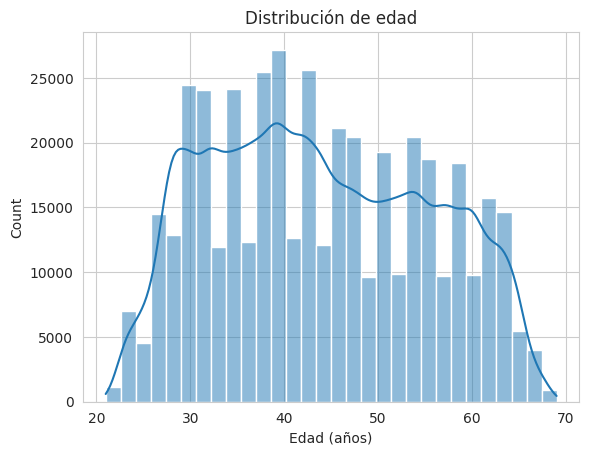

In [195]:
df['AGE'] = (df['DAYS_BIRTH'] / -365.25).round().astype(int) # Edad en años
sns.histplot(df['AGE'], bins=30, kde=True)
plt.title('Distribución de edad')
plt.xlabel('Edad (años)')
plt.show()

Hay unos picos de edad al rededor de los 40 años, en donde se encuentran los
máximos picos de cantidad de personas por edad.

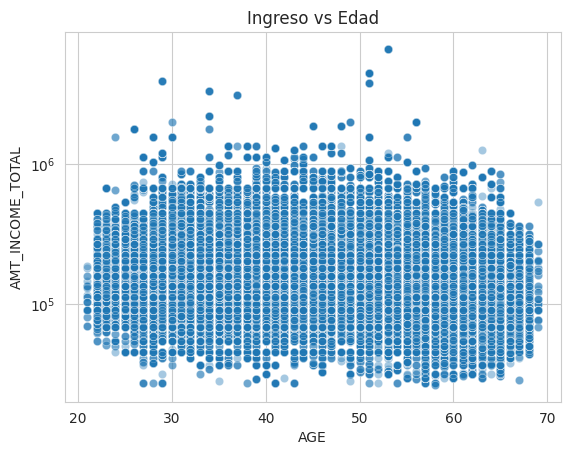

In [196]:
sns.scatterplot(x='AGE', y='AMT_INCOME_TOTAL', data=df, alpha=0.4)
plt.yscale('log')
plt.title('Ingreso vs Edad')
plt.show()


Los 2 mayores ingresos de la población están en un rango de edad entre los 50 y los 60 años

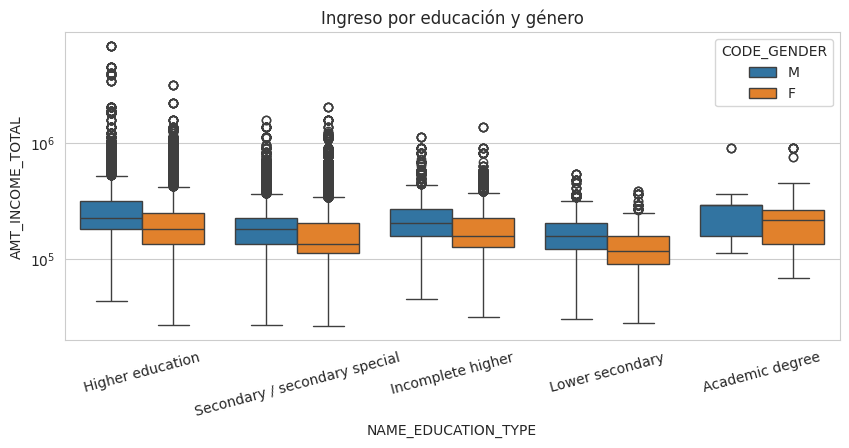

In [197]:
plt.figure(figsize=(10,4))
sns.boxplot(x='NAME_EDUCATION_TYPE', y='AMT_INCOME_TOTAL', hue='CODE_GENDER', data=df)
plt.xticks(rotation=15)
plt.yscale('log')
plt.title('Ingreso por educación y género')
plt.show()

Como reusltado de la gráfica de Ingreso por educación y genero, se observa que para cada nivel de educación el hombre gana más en todos lo niveles, incluso en Higher Education que es donde se perciben los mayores salarios.

**Variables Categóricas a numéricas**

In [198]:
from sklearn.preprocessing import OrdinalEncoder
# Identificar variables categóricas
cat_cols = df.select_dtypes(include=['object']).columns

# Ordinal Encoding para todas las variables categóricas
ordinal_encoder = OrdinalEncoder()
df[cat_cols] = ordinal_encoder.fit_transform(df[cat_cols])
df



,ID,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_MOBIL,FLAG_WORK_PHONE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,AGE
0,5008804,1.0,1.0,1.0,0,427500.0,4.0,1.0,0.0,4.0,-12005,-4542,1,1,0,0,18.0,2.0,33
1,5008805,1.0,1.0,1.0,0,427500.0,4.0,1.0,0.0,4.0,-12005,-4542,1,1,0,0,18.0,2.0,33
2,5008806,1.0,1.0,1.0,0,112500.0,4.0,4.0,1.0,1.0,-21474,-1134,1,0,0,0,16.0,2.0,59
3,5008808,0.0,0.0,1.0,0,270000.0,0.0,4.0,3.0,1.0,-19110,-3051,1,0,1,1,14.0,1.0,52
4,5008809,0.0,0.0,1.0,0,270000.0,0.0,4.0,3.0,1.0,-19110,-3051,1,0,1,1,14.0,1.0,52
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
438552,6840104,1.0,0.0,1.0,0,135000.0,1.0,4.0,2.0,1.0,-22717,365243,1,0,0,0,18.0,1.0,62
438553,6840222,0.0,0.0,0.0,0,103500.0,4.0,4.0,3.0,1.0,-15939,-3007,1,0,0,0,8.0,1.0,44
438554,6841878,0.0,0.0,0.0,0,54000.0,0.0,1.0,3.0,5.0,-8169,-372,1,1,0,0,14.0,1.0,22
438555,6842765,0.0,0.0,1.0,0,72000.0,1.0,4.0,1.0,1.0,-21673,365243,1,0,0,0,18.0,2.0,59
